# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

In [9]:
! git clone --progress https://github.com/natekim416/scratchpad
%run ./scratchpad/get_data.py

fatal: destination path 'scratchpad' already exists and is not an empty directory.


**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
"""
I removed all ","s and turned potential invalid strings to NaN. Removing the commas
standardizes the numbers and parses them correctly. Turning the potential invalid strings to NaN prevents crashes
"""

airbnb = pd.read_csv('/content/data/airbnb_NYC.csv', encoding='latin1')

#keep original for comparison
airbnb["Price_Original"] = airbnb["Price"]
airbnb["Price_clean"] = (airbnb["Price"].astype(str).str.strip().replace({"": np.nan, "None": np.nan, "nan": np.nan}).str.replace(r"[\,]", "", regex=True))
airbnb["Price_clean"] = pd.to_numeric(airbnb["Price_clean"], errors="coerce")

missing_price = airbnb["Price_clean"].isna().sum()
int(missing_price)

0

Ended up with 0 missing prices

In [12]:
mn = pd.read_csv("/content/data/mn_police_use_of_force.csv")

mn["subject_injury_clean"] = (mn["subject_injury"].fillna("").astype(str).str.strip().replace("", np.nan))

# Proportion missing
prop_missing = mn["subject_injury_clean"].isna().mean()
print("Proportion missing:", prop_missing)

ct = pd.crosstab(mn["force_type"], mn["subject_injury_clean"], dropna=False)
print(ct.head(20))

mn["subject_injury"] = mn["subject_injury_clean"].fillna("Missing")
mn


Proportion missing: 0.7619342359767892
subject_injury_clean           No   Yes   NaN
force_type                                   
Baton                           0     2     2
Bodily Force                 1093  1286  7051
Chemical Irritant             131    41  1421
Firearm                         2     0     0
Gun Point Display              33    44    27
Improvised Weapon              34    40    74
Less Lethal                     0     0    87
Less Lethal Projectile          1     2     0
Maximal Restraint Technique     0     0   170
Police K9 Bite                  2    44    31
Taser                         150   172   985


,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood,subject_injury_clean
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,Missing,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East,NaN
1,2016/01/01 02:19:34,Fight,No,DISCON,Missing,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West,NaN
2,2016/01/01 02:19:34,Fight,No,DISCON,Missing,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West,NaN
3,2016/01/01 02:28:48,Fight,No,PRIORI,Missing,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West,NaN
4,2016/01/01 02:28:48,Fight,No,PRIORI,Missing,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12920,2021/08/30 21:38:46,Assault in Progress,Yes,ASLT5,Missing,Bodily Force,Joint Lock,White,Female,69.0,NaN,1,Loring Park,NaN
12921,2021/08/30 22:32:22,Unwanted Person,Yes,CIC,Missing,Bodily Force,Joint Lock,NaN,NaN,NaN,NaN,1,Cedar Riverside,NaN
12922,2021/08/31 12:03:08,Overdose w/All,Yes,FORCE,Missing,Bodily Force,Body Weight Pin,Black,Male,NaN,NaN,3,Seward,NaN
12923,2021/08/31 12:52:52,Attempt Pick-Up,No,WT,Missing,Bodily Force,Body Weight Pin,Black,Male,31.0,NaN,4,Camden Industrial,NaN


Missing 76%. Much of this percentage is made up of bodily force, chemical irritant, and  tases.

In [13]:
met = pd.read_csv("/content/data/metabric.csv")

met["overall_survival_dummy"] = (met["Overall Survival Status"].astype(str).str.strip().str.upper()
      .map(lambda x: 1 if "LIVING" in x else 0)
)

met["Overall Survival Status"] = met["overall_survival_dummy"]
met

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage,overall_survival_dummy
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,1,YES,2.615035,10.0,1.0,1
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,0,NO,2.615035,15.0,2.0,0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,1,YES,1.307518,25.0,2.0,1
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,0,YES,2.615035,40.0,2.0,0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,0,YES,5.230071,31.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,70.65,BREAST CONSERVING,Breast Cancer,NO,NO,0.0,9.0,2.040,201.166667,1,YES,11.767659,20.0,1.0,1
1339,75.62,MASTECTOMY,Breast Cancer,NO,NO,0.0,4.0,4.040,105.200000,0,NO,5.230071,20.0,1.0,0
1340,52.84,BREAST CONSERVING,Breast Cancer,YES,NO,6.0,5.0,5.040,200.333333,1,YES,6.537589,20.0,2.0,1
1341,48.59,MASTECTOMY,Breast Cancer,YES,NO,1.0,6.0,5.060,14.700000,0,YES,7.845106,30.0,2.0,0


In [14]:
missing_reviews = airbnb["Review Scores Rating"].isna().sum()
print("Missing Review Scores Rating:", missing_reviews)

median_rating = airbnb["Review Scores Rating"].median()
print("Median (non-missing):", median_rating)

airbnb["Review_Scores_Rating_imputed"] = airbnb["Review Scores Rating"].fillna(median_rating)

print("Missing after imputation:", airbnb["Review_Scores_Rating_imputed"].isna().sum())

Missing Review Scores Rating: 8323
Median (non-missing): 94.0
Missing after imputation: 0


It shrinks variation (lots of listings get the exact same median rating),
which can weaken relationships and distort model estimates.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [15]:
#Question 1
df = pd.read_excel("/content/GSAF5.xls")

"read_excel" works because the file is an excel file

In [16]:
#Question 2
print(df.columns)
print(df[["Unnamed: 21", "Unnamed: 22"]].notna().sum())
df = df.drop(columns=["Unnamed: 21", "Unnamed: 22"], errors="ignore")


Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')
Unnamed: 21    1
Unnamed: 22    2
dtype: int64


One row = one recorded shark-attack (a single event record with a date/year/type/location/victim info) This matters because each row is the unit you count when you ask “are attacks increasing over time?”

Year range: 5.0 to 2026.0


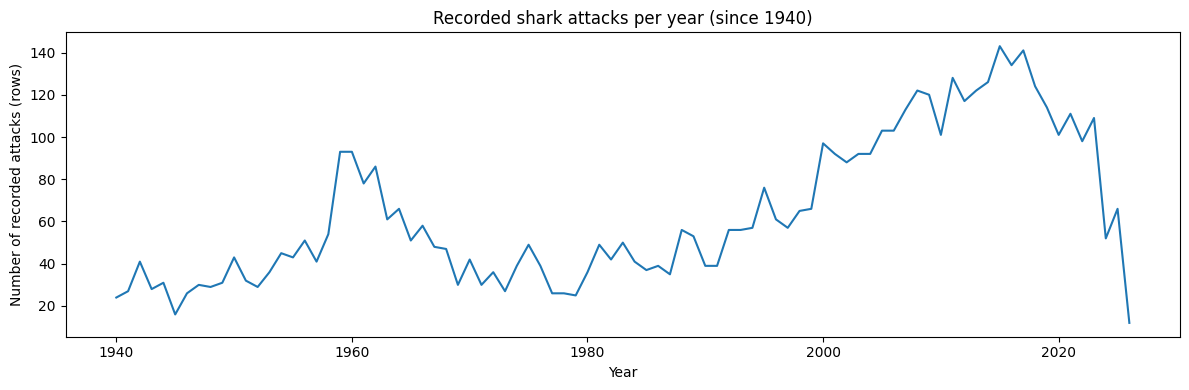

In [17]:
#Question 4
df["Year_clean"] = pd.to_numeric(df["Year"], errors="coerce")
df.loc[df["Year_clean"] == 0, "Year_clean"] = np.nan

print("Year range:", df["Year_clean"].min(), "to", df["Year_clean"].max())

since1940 = df[df["Year_clean"] >= 1940].copy()
counts_by_year = since1940.groupby(since1940["Year_clean"].astype(int)).size()

plt.figure(figsize=(12,4))
counts_by_year.plot()
plt.xlabel("Year")
plt.ylabel("Number of recorded attacks (rows)")
plt.title("Recorded shark attacks per year (since 1940)")
plt.tight_layout()
plt.show()

Since 1940, there's been an increase of attacks, but then around 2015, there's a steep drop off. This drop off could result in less data collection or less attacks

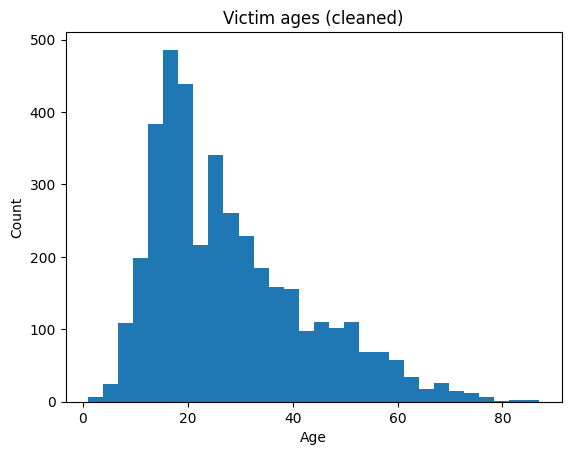

In [18]:
#Question 5
df["Age_clean"] = pd.to_numeric(df["Age"].replace(["?", ""], np.nan), errors="coerce")

plt.hist(df["Age_clean"].dropna(), bins=30)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Victim ages (cleaned)")
plt.show()

In [19]:
t = df["Type"].fillna("").astype(str).str.strip().str.lower()

df["Type_clean"] = "Unknown"
df.loc[t.str.contains("unprovoked", na=False), "Type_clean"] = "Unprovoked"
df.loc[t.str.contains("provoked", na=False) & ~t.str.contains("unprovoked", na=False), "Type_clean"] = "Provoked"

prop_unprovoked = (df["Type_clean"] == "Unprovoked").mean()
print("Proportion unprovoked:", prop_unprovoked)

Proportion unprovoked: 0.7387616624257846


In [20]:
#Question 7
fatal_norm = df["Fatal Y/N"].astype(str).str.strip().str.upper()

def clean_fatal(x):
    if x in {"", "NAN", "UNKNOWN", "?", "NA", "N/A", "NONE"}:
        return "Unknown"
    if x.startswith("Y"):
        return "Y"
    if x.startswith("N"):
        return "N"
    return "Unknown"

df["Fatal_clean"] = fatal_norm.map(clean_fatal)
df["Fatal_clean"].value_counts(dropna=False)


,count
Fatal_clean,
N,4943
Y,1490
Unknown,641


In [21]:
#Question 8
df["Type_clean"] = df["Type"].fillna("").astype(str).str.strip()

known = df[df["Fatal_clean"].isin(["Y","N"])].copy()
known["is_fatal"] = (known["Fatal_clean"] == "Y").astype(int)

fatal_rate = known.groupby("Type_clean")["is_fatal"].mean()
counts = pd.crosstab(known["Type_clean"], known["Fatal_clean"])

print(fatal_rate)
print(counts)

Type_clean
                       0.307692
?                      0.000000
Boat                   0.000000
Invalid                0.320000
Provoked               0.033071
Questionable           0.363636
Sea Disaster           0.717300
Under investigation    0.000000
Unprovoked             0.246357
Unverified             0.000000
Watercraft             0.032070
unprovoked             0.000000
Name: is_fatal, dtype: float64
Fatal_clean             N     Y
Type_clean                     
                        9     4
?                       1     0
Boat                    7     0
Invalid                17     8
Provoked              614    21
Questionable           14     8
Sea Disaster           67   170
Under investigation     1     0
Unprovoked           3879  1268
Unverified              1     0
Watercraft            332    11
unprovoked              1     0


**Question 8: Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?**

The attack is more likely to be fatal when the attack is unprovoked.

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?



1.   The paper is about how to make data cleaning as easy and effective as possible through data tidying. He presents a structure where each variable is a column, each observation is a row, and each type of observational unit is a table. He then claims that this structure makes it easy to tidy messy datasets because only a small set of tools are needed to deal with a wide range of un-tidy datasets.
2.   The tidy data standard has been designed to facilitate initial exploration and analysis of the data and to simplify the development of data analysis tools that work well together.
3.

*   "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." *
*   He means: tidy datasets share the same predictable structure (so they “all look alike”), but messy datasets can be disorganized in countless different ways (so each mess is unique).
* *"For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."*
* Across all datasets, the same columns could reasonably be treated differently depending on the question, so there’s no one universal definition that always fits.

4.  
* Values = actual data entries
* Variables = all values that measure the same underlying attribute
* Observations = all values measured on the same unit

5.  Tidy data is a mapping between the meaning and the structure. A dataset is tidy when: Each variable forms a column, each observation forms a row, and each type of observational unit forms a tab.

6.
* Column headers are values, not variable names
* Multiple variables stored in one column
* Variables stored in both rows and columns
* Multiple types of observational units stored in the same table
* A single observational unit stored in multiple tables

Table 4  is messy because the income levels are stored as column headers (so headers are values), but “income” itself should be a variable.

Melting means turning columns into rows so that column headers that are actually values become entries in a variable.

7. Table 11 has variables scattered in multiple directions: some variables are in columns (id/year/month), days are spread across many columns , and tmin/tmax are spread across rows. To fix Table 11, Wickham first melts it using id/year/month and element as identifying columns. After melting, the dataset is “mostly tidy” but still has two variables stored in rows (tmin/tmax). Then you “cast/unstack” so tmin and tmax become separate columns, giving Table 12(b), where each row is a day’s observation and each variable has its own column.





**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

In [22]:
#Queation 1
df = pd.read_csv("/content/data/ForeignGifts_edu.csv")


count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64


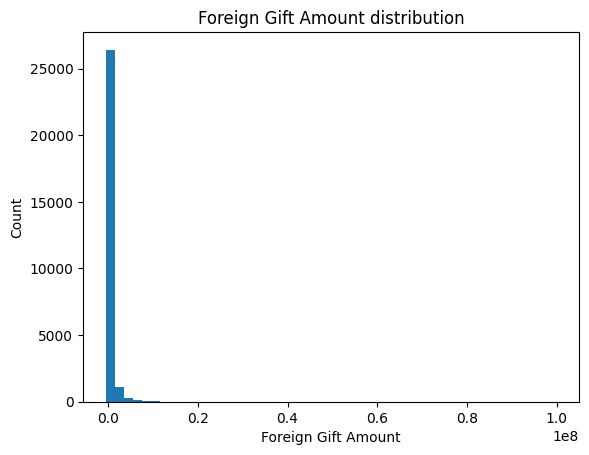

In [23]:
#Question 2
print(df["Foreign Gift Amount"].describe())

plt.hist(df["Foreign Gift Amount"].dropna(), bins=50)
plt.xlabel("Foreign Gift Amount")
plt.ylabel("Count")
plt.title("Foreign Gift Amount distribution")
plt.show()

This distribution is extremely skewed because of the max being 1.000000e+08. The findings have a mean of 5.882327e+05 and there are 2.822100e+04 of them

In [24]:
#Question 3
type_counts = df.groupby("Gift Type")["ID"].count().sort_values(ascending=False)
print(type_counts)

type_props = 100 * (type_counts / type_counts.sum())
print("\n",type_props)


Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: ID, dtype: int64

 Gift Type
Contract         61.209737
Monetary Gift    38.751285
Real Estate       0.038978
Name: ID, dtype: float64


In [25]:
#Question 4
top15_country_count = (df.groupby("Country of Giftor")["ID"].count().sort_values(ascending=False).head(15))
print("Top 15 countries by count:\n", top15_country_count)

top15_country_amount = (df.groupby("Country of Giftor")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15))
print("\nTop 15 countries by total amount:\n", top15_country_amount)

Top 15 countries by count:
 Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: ID, dtype: int64

Top 15 countries by total amount:
 Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                24

Top 15 institutions by total amount:
 Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


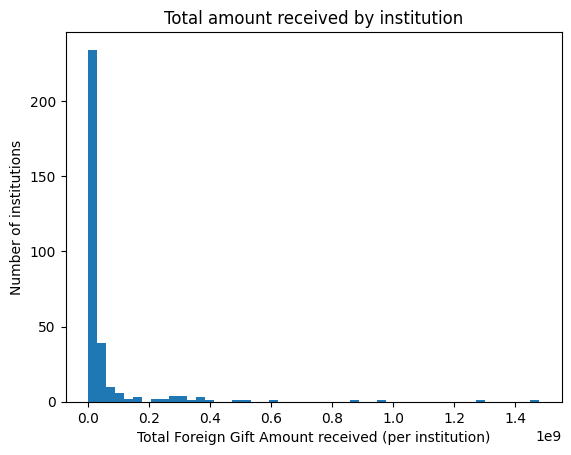

In [26]:
#Question 5
inst_totals = (df.groupby("Institution Name")["Foreign Gift Amount"].sum().sort_values(ascending=False))

print("Top 15 institutions by total amount:\n", inst_totals.head(15))

plt.hist(inst_totals.dropna(), bins=50)
plt.xlabel("Total Foreign Gift Amount received (per institution)")
plt.ylabel("Number of institutions")
plt.title("Total amount received by institution")
plt.show()

In [27]:
#Question 6
top_giftors = (df.groupby("Giftor Name")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15))
print("Top giftors by total amount:\n", top_giftors)

Top giftors by total amount:
 Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [28]:
#Question 1
df = pd.read_csv("/content/data/college_completion.csv")

#Question 2
print("Observations (rows):", df.shape[0])
print("Variables (columns):", df.shape[1])

df.head()

cols = ["level", "aid_value", "control", "grad_100_value"]
cc = df[cols].copy()
cc.head()

Observations (rows): 3798
Variables (columns): 63


,level,aid_value,control,grad_100_value
0,4-year,7142.0,Public,10.0
1,4-year,6088.0,Public,29.4
2,4-year,2540.0,Private not-for-profit,0.0
3,4-year,6647.0,Public,16.5
4,4-year,7256.0,Public,8.8


In [29]:
#Question 3
ct_counts = pd.crosstab(cc["control"], cc["level"])
ct_counts
ct_props = pd.crosstab(cc["control"], cc["level"], normalize="index")
ct_props


level,2-year,4-year
control,,
Private for-profit,0.468750,0.531250
Private not-for-profit,0.054487,0.945513
Public,0.594352,0.405648


Private not-for-profit schools are almost entirely 4-year, public schools are more often 2-year than 4-year, and private for-profit schools are almost equally divided between 2-year and 4-year programs.

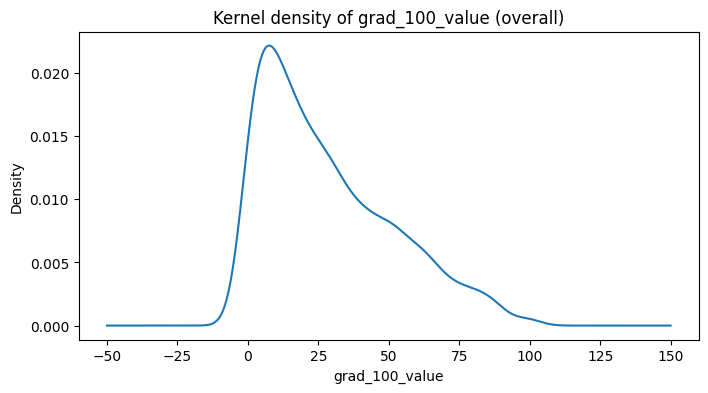

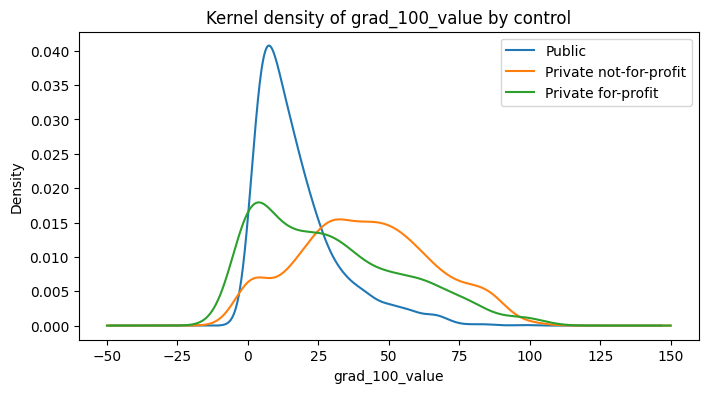

In [30]:
#Question 4
cc["grad_100_value"] = pd.to_numeric(cc["grad_100_value"], errors="coerce")
cc["grad_100_value"].describe()
plt.figure(figsize=(8,4))
cc["grad_100_value"].dropna().plot(kind="kde")
plt.xlabel("grad_100_value")
plt.title("Kernel density of grad_100_value (overall)")
plt.show()
cc.groupby("control")["grad_100_value"].describe()
plt.figure(figsize=(8,4))
for c in cc["control"].dropna().unique():
    cc.loc[cc["control"] == c, "grad_100_value"].dropna().plot(kind="kde", label=c)

plt.xlabel("grad_100_value")
plt.title("Kernel density of grad_100_value by control")
plt.legend()
plt.show()


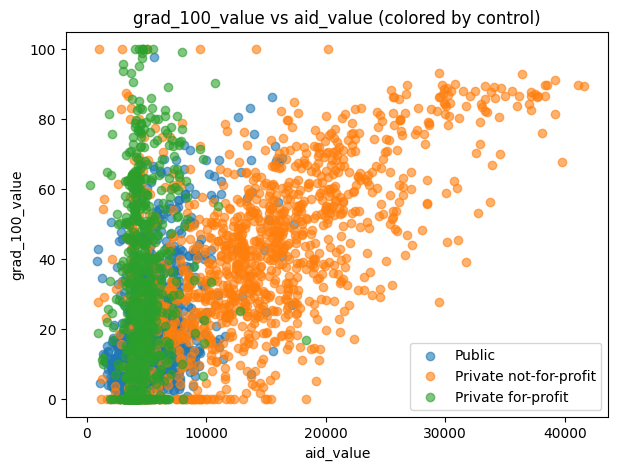

Overall covariance: 88610.48316902434
Overall correlation: 0.5758792845936073

 Public
n = 1499
covariance: 15355.146211760217
correlation: 0.4824810458983382

 Private not-for-profit
n = 1189
covariance: 109274.12333702881
correlation: 0.6015909241488573

 Private for-profit
n = 778
covariance: 6897.524957237808
correlation: 0.1883627008424557


In [31]:
#Question 5
cc["aid_value"] = pd.to_numeric(cc["aid_value"], errors="coerce")
cc["grad_100_value"] = pd.to_numeric(cc["grad_100_value"], errors="coerce")

plt.figure(figsize=(7,5))

for c in cc["control"].dropna().unique():
    sub = cc[cc["control"] == c][["aid_value", "grad_100_value"]].dropna()
    plt.scatter(sub["aid_value"], sub["grad_100_value"], label=c, alpha=0.6)

plt.xlabel("aid_value")
plt.ylabel("grad_100_value")
plt.title("grad_100_value vs aid_value (colored by control)")
plt.legend()
plt.show()

xy = cc[["aid_value", "grad_100_value"]].dropna()
print("Overall covariance:", xy["aid_value"].cov(xy["grad_100_value"]))
print("Overall correlation:", xy["aid_value"].corr(xy["grad_100_value"]))

for c in cc["control"].dropna().unique():
    sub = cc[cc["control"] == c][["aid_value", "grad_100_value"]].dropna()
    print("\n", c)
    print("n =", len(sub))
    print("covariance:", sub["aid_value"].cov(sub["grad_100_value"]))
    print("correlation:", sub["aid_value"].corr(sub["grad_100_value"]))

Aid varies most clearly and positively with graduation rates for private not-for-profit institutions.

Private not-for-profit has a stronger positive relationship than public. Although public still has a positive relationship. Private for-profit has a little to no positive relationship because it looks like it just goes straight up

**USED AI FOR LATEX FORMATTING!!!!!!!!!!!!!**




**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.



\begin{aligned}
m(a+bX)
&= \frac{1}{N}\sum_{i=1}^N (a+bx_i)
= \frac{1}{N}\left(\sum_{i=1}^N a + b\sum_{i=1}^N x_i\right)
= \frac{1}{N}(Na) + b\frac{1}{N}\sum_{i=1}^N x_i
= a + b\,m(X).
\end{aligned}






2. Show that $ \text{cov}(X,X) = s^2$.



\begin{aligned}
\operatorname{cov}(X,X)
&= \frac{1}{N}\sum_{i=1}^N (x_i-m(X))(x_i-m(X))
= \frac{1}{N}\sum_{i=1}^N (x_i-m(X))^2
= s^2.
\end{aligned}




3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$




\begin{aligned}
\operatorname{cov}(X,a+bY)
&= \frac{1}{N}\sum_{i=1}^N (x_i-m(X))\big((a+by_i)-m(a+bY)\big) \\
&= \frac{1}{N}\sum_{i=1}^N (x_i-m(X))\big((a+by_i)-(a+bm(Y))\big) \\
&= \frac{1}{N}\sum_{i=1}^N (x_i-m(X))\,b(y_i-m(Y)) \\
&= b\,\operatorname{cov}(X,Y).
\end{aligned}




4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.



\begin{aligned}
\operatorname{cov}(a+bX,a+bY)
&= \frac{1}{N}\sum_{i=1}^N \big((a+bx_i)-m(a+bX)\big)\big((a+by_i)-m(a+bY)\big) \\
&= \frac{1}{N}\sum_{i=1}^N \big(b(x_i-m(X))\big)\big(b(y_i-m(Y))\big) \\
&= b^2\,\operatorname{cov}(X,Y).
\end{aligned}




5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?



Both statements are true.

For the median:

The median of $a + bX$ equals $a + b \times \text{med}(X)$.

When you add a constant $a$ to every value, the median shifts by $a$. When you multiply every value by $b > 0$, the median scales by $b$. Since $b > 0$, the order of the data points is preserved, so the middle value(s) transform accordingly.

For the IQR:

The IQR of $a + bX$ equals $b \times \text{IQR}(X)$.

The IQR (interquartile range) is $Q_3 - Q_1$. When you apply the transformation $a + bX$, $Q_3$ becomes $a + bQ_3$ and $Q_1$ becomes $a + bQ_1$. So the new IQR = $(a + bQ_3) - (a + bQ_1) = b(Q_3 - Q_1) = b \times \text{IQR}(X)$.

Notice that the constant $a$ cancels out in the IQR calculation because IQR measures spread, not location. Adding a constant shifts all values equally but doesn't change the spread.



6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.



Example showing that $\mathbb{E}[X^2] \neq (\mathbb{E}[X])^2$ and $\mathbb{E}[\sqrt{X}] \neq \sqrt{\mathbb{E}[X]}$:

Let $X$ take values $\{1, 9\}$ with equal probability $\frac{1}{2}$.

Then $\mathbb{E}[X] = \frac{1}{2}(1) + \frac{1}{2}(9) = 5$.

For the squared transformation:

$\mathbb{E}[X^2] = \frac{1}{2}(1^2) + \frac{1}{2}(9^2) = \frac{1}{2}(1) + \frac{1}{2}(81) = 41$

But $(\mathbb{E}[X])^2 = 5^2 = 25$

So $\mathbb{E}[X^2] = 41 \neq 25 = (\mathbb{E}[X])^2$.

For the square root transformation:

$\mathbb{E}[\sqrt{X}] = \frac{1}{2}(\sqrt{1}) + \frac{1}{2}(\sqrt{9}) = \frac{1}{2}(1) + \frac{1}{2}(3) = 2$

But $\sqrt{\mathbb{E}[X]} = \sqrt{5} \approx 2.236$

So $\mathbb{E}[\sqrt{X}] = 2 \neq 2.236 \approx \sqrt{\mathbb{E}[X]}$.

This demonstrates that the results we derived above  depend on $Y = a + bX$.




**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

In [32]:
#question 1
df = pd.read_csv("/content/data/ames_prices.csv")

df = df[["price", "Bldg.Type"]].copy()

df.head()


,price,Bldg.Type
0,215000,1Fam
1,105000,1Fam
2,172000,1Fam
3,244000,1Fam
4,189900,1Fam


count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64


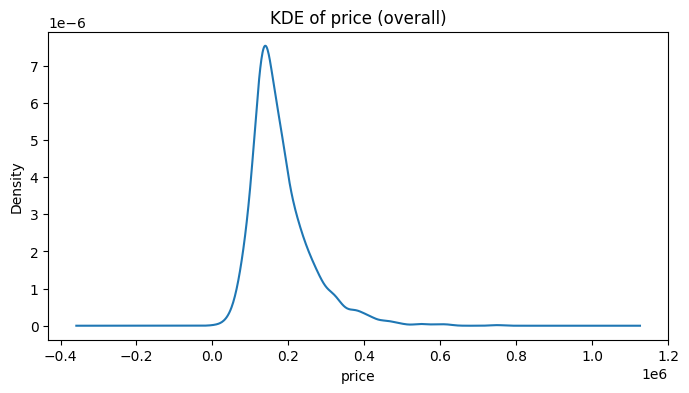

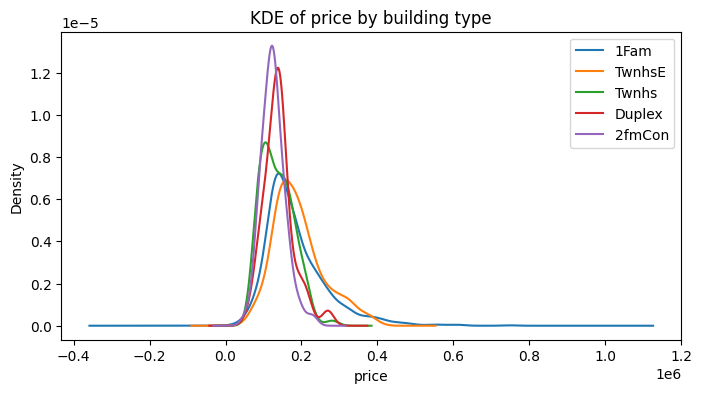

Most expensive (mean):
 Bldg.Type
TwnhsE    192311.914163
1Fam      184812.041237
Duplex    139808.935780
Twnhs     135934.059406
2fmCon    125581.709677
Name: price, dtype: float64

Highest variance:
 Bldg.Type
1Fam      6.859451e+09
TwnhsE    4.381346e+09
Twnhs     1.758874e+09
Duplex    1.560169e+09
2fmCon    9.665408e+08
Name: price, dtype: float64


In [33]:
#Question 2
print(df["price"].describe())

plt.figure(figsize=(8,4))
df["price"].dropna().plot(kind="kde")
plt.xlabel("price")
plt.title("KDE of price (overall)")
plt.show()

plt.figure(figsize=(8,4))
for t in df["Bldg.Type"].dropna().unique():
    df.loc[df["Bldg.Type"] == t, "price"].dropna().plot(kind="kde", label=t)

plt.xlabel("price")
plt.title("KDE of price by building type")
plt.legend()
plt.show()

desc_by_type = df.groupby("Bldg.Type")["price"].describe()
desc_by_type

mean_by_type = df.groupby("Bldg.Type")["price"].mean().sort_values(ascending=False)
var_by_type  = df.groupby("Bldg.Type")["price"].var().sort_values(ascending=False)

print("Most expensive (mean):\n", mean_by_type)
print("\nHighest variance:\n", var_by_type)

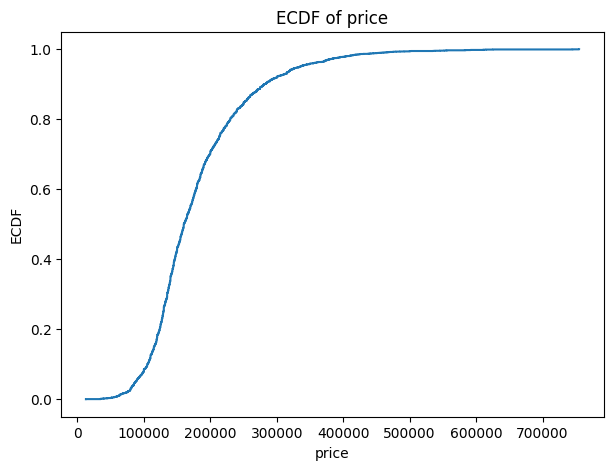

,price
0.00,12789.0
0.25,129500.0
0.50,160000.0
0.75,213500.0
1.00,755000.0


In [34]:
#Question 3
x = df["price"].dropna().sort_values().values
y = np.arange(1, len(x)+1) / len(x)

plt.figure(figsize=(7,5))
plt.step(x, y, where="post")
plt.xlabel("price")
plt.ylabel("ECDF")
plt.title("ECDF of price")
plt.show()

five_num = df["price"].quantile([0, 0.25, 0.5, 0.75, 1.0])
five_num

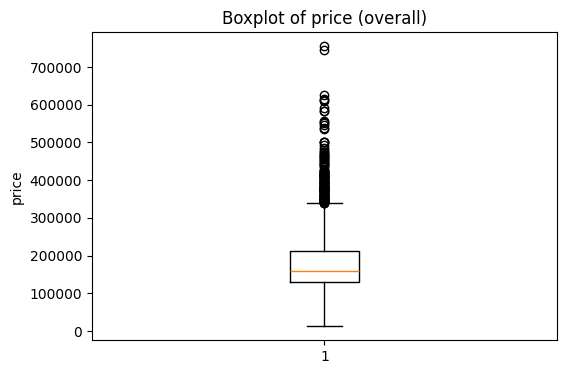

/tmp/ipython-input-698677655.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=types, vert=True)


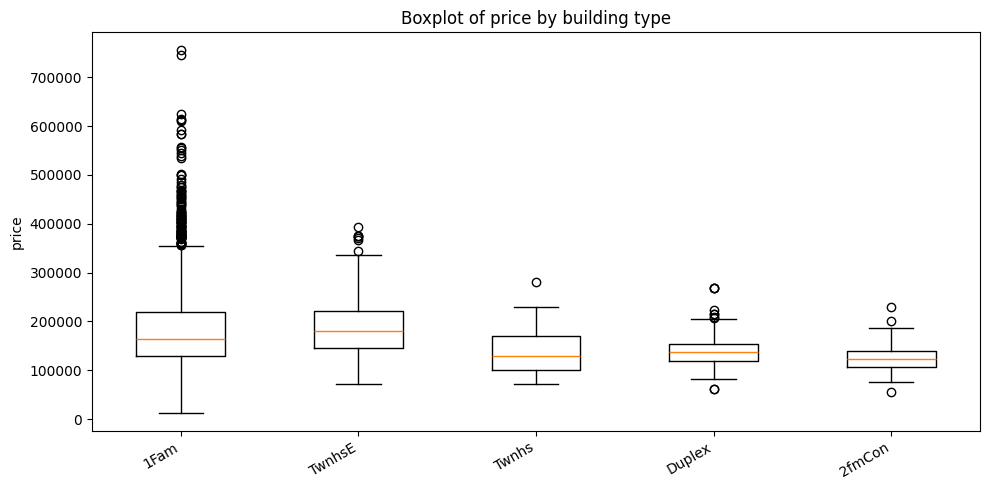

In [35]:
plt.figure(figsize=(6,4))
plt.boxplot(df["price"].dropna(), vert=True)
plt.ylabel("price")
plt.title("Boxplot of price (overall)")
plt.show()

types = df["Bldg.Type"].dropna().unique()
data = [df.loc[df["Bldg.Type"] == t, "price"].dropna() for t in types]

plt.figure(figsize=(10,5))
plt.boxplot(data, labels=types, vert=True)
plt.ylabel("price")
plt.title("Boxplot of price by building type")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

For price, there are a couple of outliers near 700,000 bt most of prices reside near 150,000 and 200,000.

For price by building type, 1 Family houses have a lot more variation compared to 2 family con which has the tighest spread.

In [36]:
#question 5
q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

df["price_outlier"] = ((df["price"] < lower) | (df["price"] > upper)).astype(int)

df["price_outlier"].value_counts(dropna=False)


,count
price_outlier,
0,2793
1,137


count      2930.000000
mean     177082.283959
std       67906.837135
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      339500.000000
Name: price_winsor, dtype: float64


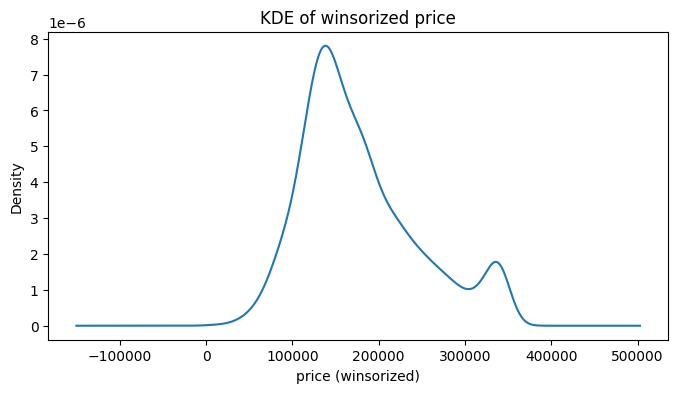

,original,winsorized
count,2930.000000,2930.000000
mean,180796.060068,177082.283959
std,79886.692357,67906.837135
min,12789.000000,12789.000000
25%,129500.000000,129500.000000
50%,160000.000000,160000.000000
75%,213500.000000,213500.000000
max,755000.000000,339500.000000


In [37]:
#Question 6
df["price_winsor"] = df["price"].clip(lower=lower, upper=upper)

print(df["price_winsor"].describe())

plt.figure(figsize=(8,4))
df["price_winsor"].dropna().plot(kind="kde")
plt.xlabel("price (winsorized)")
plt.title("KDE of winsorized price")
plt.show()

#used AI to make this compare

compare = pd.DataFrame({
    "original": df["price"].describe(),
    "winsorized": df["price_winsor"].describe()
})
compare

The mean and std are changed slightly, but  everything else stays the same